In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel(r"C:\Users\lavan\OneDrive\Desktop\Great learning\Data Mining\Graded Project Data\Clustering Clean Ads_Data-2.xlsx")

In [3]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [4]:
df.shape

(23066, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [6]:
# List of numerical column names
numerical_columns = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 
                     'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

# Iterate through the numerical columns and count outliers using the IQR method
for column_name in numerical_columns:
    # Calculate the quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    num_outliers = ((df[column_name] < lower_bound) | (df[column_name] > upper_bound)).sum()

    # Print the column name and the count of outliers
    print(f"Number of outliers in '{column_name}': {num_outliers}")


Number of outliers in 'Ad - Length': 0
Number of outliers in 'Ad- Width': 0
Number of outliers in 'Ad Size': 8448
Number of outliers in 'Available_Impressions': 2378
Number of outliers in 'Matched_Queries': 3192
Number of outliers in 'Impressions': 3269
Number of outliers in 'Clicks': 1691
Number of outliers in 'Spend': 2081
Number of outliers in 'Fee': 3517
Number of outliers in 'Revenue': 2325
Number of outliers in 'CTR': 44
Number of outliers in 'CPM': 34
Number of outliers in 'CPC': 412


In [8]:
from scipy import stats

# List of numerical column names
numerical_columns = [
    'Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
    'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee',
    'Revenue', 'CTR', 'CPM', 'CPC'
]

# Iterate through numerical columns and calculate skewness
for column_name in numerical_columns:
    skewness = stats.skew(df[column_name].dropna())
    print(f"Skewness for {column_name}: {skewness:.2f}")


Skewness for Ad - Length: 0.33
Skewness for Ad- Width: 0.21
Skewness for Ad Size: 1.21
Skewness for Available_Impressions: 3.07
Skewness for Matched_Queries: 2.98
Skewness for Impressions: 2.97
Skewness for Clicks: 2.94
Skewness for Spend: 2.58
Skewness for Fee: -2.30
Skewness for Revenue: 2.79
Skewness for CTR: 0.75
Skewness for CPM: 0.75
Skewness for CPC: 1.85


CTR and CPM have skewness values of approximately 0.75, which are relatively close to 0. This suggests that these two columns may be somewhat symmetrically distributed, but they are not perfectly normally distributed.CPC has a skewness value of 1.85, which is significantly greater than 1. This indicates that the data in the CPC column is positively skewed, meaning it has a longer tail on the right side of the distribution

Whether we should fill missing values with the mean or median depends on the nature of  data and the context of your analysis. Here are some guidelines:

Mean: It can be filled with the mean when our data is approximately normally distributed and there are no significant outliers. The mean is sensitive to extreme values, so if our data contains outliers, filling with the mean might not be a good choice.

Median: The median is a better choice when your data has outliers or is not normally distributed. It's a robust measure of central tendency that is less affected by extreme values. If your data is skewed or has a non-normal distribution, consider using the median.

In [9]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Identify datetime column
datetime_col = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Identify categorical columns (excluding numerical and datetime)
categorical_cols = df.select_dtypes(exclude=['number', 'datetime64[ns]']).columns.tolist()

# Count the number of numerical, datetime, and categorical columns
num_numerical_cols = len(numerical_cols)
num_datetime_cols = len(datetime_col)
num_categorical_cols = len(categorical_cols)

print("Numerical Columns:")
print(numerical_cols)
print("\nNumber of Numerical Columns:", num_numerical_cols)

print("\nDatetime Columns:")
print(datetime_col)
print("\nNumber of Datetime Columns:", num_datetime_cols)

print("\nCategorical Columns:")
print(categorical_cols)
print("\nNumber of Categorical Columns:", num_categorical_cols)



Numerical Columns:
['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

Number of Numerical Columns: 13

Datetime Columns:
[]

Number of Datetime Columns: 0

Categorical Columns:
['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

Number of Categorical Columns: 6


In [10]:
import pandas as pd

# Assuming df is your DataFrame
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d-%H')


In [11]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Identify datetime column
datetime_col = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Identify categorical columns (excluding numerical and datetime)
categorical_cols = df.select_dtypes(exclude=['number', 'datetime64[ns]']).columns.tolist()

# Count the number of numerical, datetime, and categorical columns
num_numerical_cols = len(numerical_cols)
num_datetime_cols = len(datetime_col)
num_categorical_cols = len(categorical_cols)

print("Numerical Columns:")
print(numerical_cols)
print("\nNumber of Numerical Columns:", num_numerical_cols)

print("\nDatetime Columns:")
print(datetime_col)
print("\nNumber of Datetime Columns:", num_datetime_cols)

print("\nCategorical Columns:")
print(categorical_cols)
print("\nNumber of Categorical Columns:", num_categorical_cols)



Numerical Columns:
['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

Number of Numerical Columns: 13

Datetime Columns:
['Timestamp']

Number of Datetime Columns: 1

Categorical Columns:
['InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']

Number of Categorical Columns: 5


In [12]:
# Calculate the median for each column
median_ctr = df['CTR'].median()
median_cpm = df['CPM'].median()
median_cpc = df['CPC'].median()

# Impute missing values with the respective medians
df['CTR'].fillna(median_ctr, inplace=True)
df['CPM'].fillna(median_cpm, inplace=True)
df['CPC'].fillna(median_cpc, inplace=True)


In [13]:
# Find and count null records in each column
null_counts = df.isnull().sum()

# Display the columns with their respective counts of null records
print("Null Records per Column:")
print(null_counts)

Null Records per Column:
Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              23066 non-null  datetime64[ns]
 1   InventoryType          23066 non-null  object        
 2   Ad - Length            23066 non-null  int64         
 3   Ad- Width              23066 non-null  int64         
 4   Ad Size                23066 non-null  int64         
 5   Ad Type                23066 non-null  object        
 6   Platform               23066 non-null  object        
 7   Device Type            23066 non-null  object        
 8   Format                 23066 non-null  object        
 9   Available_Impressions  23066 non-null  int64         
 10  Matched_Queries        23066 non-null  int64         
 11  Impressions            23066 non-null  int64         
 12  Clicks                 23066 non-null  int64         
 13  S

In [17]:
import pandas as pd

# Assuming you have a DataFrame named 'df' and a list of numerical column names 'numerical_columns'
# Define the list of numerical column names
numerical_columns = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 
                     'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

# Function to treat outliers using IQR
def treat_outliers_with_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outlier values with the lower or upper bound
    data[column_name] = data[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
# Treat outliers in each numerical column
for column_name in numerical_columns:
    treat_outliers_with_iqr(df, column_name)

# Now, your DataFrame 'df' has outliers treated using the IQR method


In [16]:
# List of numerical column names
numerical_columns = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 
                     'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

# Iterate through the numerical columns and count outliers using the IQR method
for column_name in numerical_columns:
    # Calculate the quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    num_outliers = ((df[column_name] < lower_bound) | (df[column_name] > upper_bound)).sum()

    # Print the column name and the count of outliers
    print(f"Number of outliers in '{column_name}': {num_outliers}")


Number of outliers in 'Ad - Length': 0
Number of outliers in 'Ad- Width': 0
Number of outliers in 'Ad Size': 0
Number of outliers in 'Available_Impressions': 0
Number of outliers in 'Matched_Queries': 0
Number of outliers in 'Impressions': 0
Number of outliers in 'Clicks': 0
Number of outliers in 'Spend': 0
Number of outliers in 'Fee': 0
Number of outliers in 'Revenue': 0
Number of outliers in 'CTR': 0
Number of outliers in 'CPM': 0
Number of outliers in 'CPC': 0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              23066 non-null  datetime64[ns]
 1   InventoryType          23066 non-null  object        
 2   Ad - Length            23066 non-null  int64         
 3   Ad- Width              23066 non-null  int64         
 4   Ad Size                23066 non-null  float64       
 5   Ad Type                23066 non-null  object        
 6   Platform               23066 non-null  object        
 7   Device Type            23066 non-null  object        
 8   Format                 23066 non-null  object        
 9   Available_Impressions  23066 non-null  float64       
 10  Matched_Queries        23066 non-null  float64       
 11  Impressions            23066 non-null  float64       
 12  Clicks                 23066 non-null  float64       
 13  S

In [19]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [20]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the numerical columns from your DataFrame
numerical_columns = df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler to your numerical DataFrame
scaled_data = scaler.fit_transform(numerical_columns)

# Create a new DataFrame with the scaled values rounded to two decimal places
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns.columns).round(2)

In [22]:
scaled_df

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.36,-0.43,-0.10,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-1.09,-1.34,-1.08
1,-0.36,-0.43,-0.10,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-1.08,-1.34,-1.08
2,-0.36,-0.43,-0.10,-0.75,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-1.09,-1.34,-1.08
3,-0.36,-0.43,-0.10,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-1.11,-1.34,-1.08
4,-0.36,-0.43,-0.10,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,-1.07,-1.34,-1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.43,-0.19,1.65,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,0.11,0.00,-0.51
23062,1.43,-0.19,1.65,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,0.11,0.00,-0.51
23063,1.43,-0.19,1.65,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,0.11,0.00,-0.51
23064,-1.13,1.29,-0.30,-0.76,-0.78,-0.77,-0.87,-0.89,0.54,-0.88,0.11,0.00,-0.51


Z-score scaling (standardization) in clustering:

Benefits: Improved clustering quality, faster convergence, reduced dimensionality, enhanced interpretability, and better outlier handling.
Efficiency: Speeds up convergence due to consistent feature scales.
Interpretation: Makes cluster interpretation easier.

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
wardlink = linkage(scaled_df, method = 'ward')

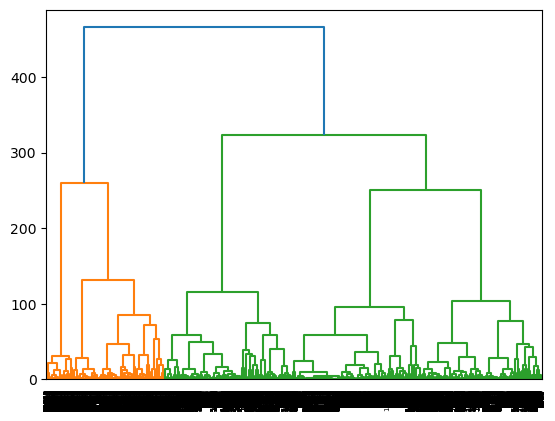

In [31]:
dend = dendrogram(wardlink)

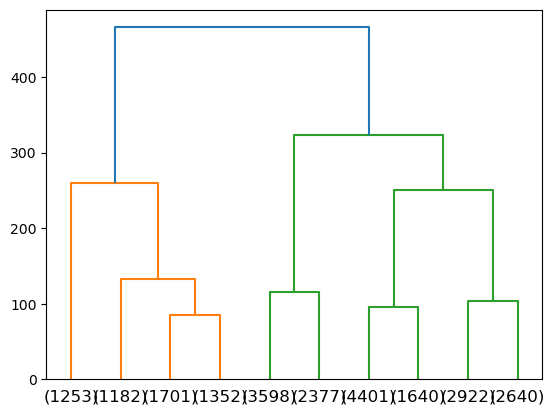

In [25]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [26]:
from scipy.cluster.hierarchy import fcluster

In [27]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [28]:
df['clusters'] = clusters

In [29]:
df['clusters'] = clusters

In [30]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
0,2020-09-02 17:00:00,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.0031,0.0,0.0,2
1,2020-09-02 10:00:00,Format1,300,250,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.0035,0.0,0.0,2
2,2020-09-01 22:00:00,Format1,300,250,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.0028,0.0,0.0,2
3,2020-09-03 20:00:00,Format1,300,250,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.0020,0.0,0.0,2
4,2020-09-04 15:00:00,Format1,300,250,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.0041,0.0,0.0,2
